In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 통계 분석 패키지
from scipy import stats
import scipy.stats

from scipy.stats import shapiro # 정규성 검증
from statsmodels.formula.api import ols # 회귀분석
# proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency #카이제곱 검정
from scipy.stats import bartlett

# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm

# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# 실루엣(Silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
# 실루엣 계수 산출 및 시각화 라이브러리 (pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer

# 데이터 전처리 : 항목 값에 대한 index 생성
from mlxtend.preprocessing import TransactionEncoder
# 지지도 계산
from mlxtend.frequent_patterns import apriori
# 연관 규칙
from mlxtend.frequent_patterns import association_rules

In [2]:
%matplotlib inline

#import matplotlib.pyplot as plt

# 맑은 고딕 적용
matplotlib.rc("font", family = "NaNumGothic")

# 음수 표시
# -값 표시
matplotlib.rc('axes', unicode_minus=False)

In [3]:
df_orders=pd.read_csv("./on_orders.csv", encoding="cp949")
df_orders

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00
1,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00
2,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00
3,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00
4,U10001,U10001-O2021-1003,14JAN21:16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00
...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,28DEC23:14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00
856619,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00
856620,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00
856621,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00


In [4]:
df_items=pd.read_csv("./on_items.csv", encoding="cp949")
df_items

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
0,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2021,15840,16130
1,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2022,17030,17340
2,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2023,17380,18640
3,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2022,14160,15350
4,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2023,15060,16160
...,...,...,...,...,...,...,...,...,...,...,...
10049,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L,2022,7180,7790
10050,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L,2021,6820,7320
10051,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수,2023,15890,17050
10052,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수,2022,14780,16370


In [5]:
df_users=pd.read_csv("./on_users.csv", encoding="cp949")
df_users

,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y
...,...,...,...,...,...
2995,U12996,여성,66,2,N
2996,U12997,남성,24,2,Y
2997,U12998,남성,31,2,Y
2998,U12999,여성,32,1,Y


1. 성별 
2. 나이 
3. 가족수 
4. 월별 객단가  → 많이 늘어나지 않음 …  
5. **연도별 → 객단가가 오름**
    1. **2-4월 매출 증대 이유**
    2. **7월에 가장 많이 팔리는 품목**  
6. 많이 사는 사람의 품목 === 조금 사는 사람의 품목 
7. **한 품목당 몇 명의 유저가 샀는가.  → 알아봐야 할 것!!!** 
8. 객단가의 차이가 작다 → 니즈를 맞추려 했으나 큰 효과를 보지 못함. 

## EDA - 분석

1. 객단가의 차이가 작다고 생각 → 고객의 니즈를 맞추려 큰 효과를 보지 못함 
    
    **⇒ 고객의 니즈에 맞추기 위한 상품 필요** 
    
2.  매년 객단가가 상승 
    
    **⇒ 상승 이유 찾아야함 → 연령별 + 연령별 객단가 확인 / 상품 단가 상승**  
    
3. **연령별 객단가 차이가 유의미한가 (검증하기)** 

1. 신규고객이 새 상품을 얼마나 구매 했는지

In [6]:
df_use=df_orders.groupby(['idUser','OrderDT','idOrder'])['ItemCode'].apply(list)

In [7]:
df_use=df_use.reset_index()

In [8]:
df_use

,idUser,OrderDT,idOrder,ItemCode
0,U10001,01APR21:19:58:32,U10001-O2021-1010,"[L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-..."
1,U10001,01MAR21:08:07:55,U10001-O2021-1016,"[L4-M22-S0360-1029, L1-M23-S0580-1082]"
2,U10001,01OCT23:14:55:08,U10001-O2023-1012,"[L1-M11-S0220-1080, L4-M12-S0350-1088, L4-M18-..."
3,U10001,03DEC21:20:59:27,U10001-O2021-1001,"[L4-M17-S0530-1019, L4-M18-S0110-1012, L1-M15-..."
4,U10001,04FEB21:16:59:31,U10001-O2021-1006,"[L1-M19-S0520-1073, L1-M11-S0160-1023, L1-M11-..."
...,...,...,...,...
171965,U13000,30JUN22:18:01:43,U13000-O2022-1002,"[L4-M22-S0650-1011, L4-M17-S0030-1030, L4-M12-..."
171966,U13000,31AUG21:19:07:55,U13000-O2021-1018,"[L4-M22-S0360-1004, L1-M13-S0440-1025]"
171967,U13000,31AUG22:18:44:00,U13000-O2022-1004,"[L4-M23-S0920-1010, L4-M12-S0200-1013]"
171968,U13000,31JUL22:20:02:15,U13000-O2022-1012,"[L4-M22-S0020-1065, L4-M12-S0640-1027, L1-M15-..."


In [9]:
df_use.apply

<bound method DataFrame.apply of         idUser           OrderDT            idOrder  \
0       U10001  01APR21:19:58:32  U10001-O2021-1010   
1       U10001  01MAR21:08:07:55  U10001-O2021-1016   
2       U10001  01OCT23:14:55:08  U10001-O2023-1012   
3       U10001  03DEC21:20:59:27  U10001-O2021-1001   
4       U10001  04FEB21:16:59:31  U10001-O2021-1006   
...        ...               ...                ...   
171965  U13000  30JUN22:18:01:43  U13000-O2022-1002   
171966  U13000  31AUG21:19:07:55  U13000-O2021-1018   
171967  U13000  31AUG22:18:44:00  U13000-O2022-1004   
171968  U13000  31JUL22:20:02:15  U13000-O2022-1012   
171969  U13000  31MAR21:20:25:23  U13000-O2021-1008   

                                                 ItemCode  
0       [L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-...  
1                  [L4-M22-S0360-1029, L1-M23-S0580-1082]  
2       [L1-M11-S0220-1080, L4-M12-S0350-1088, L4-M18-...  
3       [L4-M17-S0530-1019, L4-M18-S0110-1012, L1-M15-...  
4     

In [10]:
# 1. df_items에서 ItemCode와 ItemName 매핑 딕셔너리 생성
item_dict = df_items.set_index('ItemCode')['ItemName'].to_dict()

# 2. df_use에서 ItemCode 리스트를 ItemName 리스트로 변환
df_use['ItemNames'] = df_use['ItemCode'].apply(lambda x: [item_dict.get(code, 'Unknown') for code in x])

In [11]:
# 첫 번째 행에 대해서 길이 비교
df_use.loc[0, ['ItemCode', 'ItemNames']].apply(lambda x: len(x))

ItemCode     5
ItemNames    5
Name: 0, dtype: int64

In [12]:
# 'OrderDT' 컬럼을 datetime 형식으로 변환
df_use['OrderDT'] = pd.to_datetime(df_use['OrderDT'], format='%d%b%y:%H:%M:%S')

In [13]:
df_use

,idUser,OrderDT,idOrder,ItemCode,ItemNames
0,U10001,2021-04-01 19:58:32,U10001-O2021-1010,"[L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-...","[CJ 그릴 후랑크 240g x 2입 백설 후랑크 소시지 소세지, 세척 꿀고구마 1..."
1,U10001,2021-03-01 08:07:55,U10001-O2021-1016,"[L4-M22-S0360-1029, L1-M23-S0580-1082]","[로컬 청상추 (봉), 페퍼로니맥앤치즈2인분]"
2,U10001,2023-10-01 14:55:08,U10001-O2023-1012,"[L1-M11-S0220-1080, L4-M12-S0350-1088, L4-M18-...","[오뚜기 열라면 용기 105g x 12개(1박스), 못난이사과 미시마 3kg 중대과..."
3,U10001,2021-12-03 20:59:27,U10001-O2021-1001,"[L4-M17-S0530-1019, L4-M18-S0110-1012, L1-M15-...","[완도 급냉 대왕 전복 4미 (400g 내외), [남도장터]나이스파머스 전라도 총각..."
4,U10001,2021-02-04 16:59:31,U10001-O2021-1006,"[L1-M19-S0520-1073, L1-M11-S0160-1023, L1-M11-...","[스머커즈 무설탕 블랙베리 잼 씨드리스 무지방 197778, 오뚜기 오뚜기 옛날당면..."
...,...,...,...,...,...
171965,U13000,2022-06-30 18:01:43,U13000-O2022-1002,"[L4-M22-S0650-1011, L4-M17-S0030-1030, L4-M12-...","[[서진도농협] 진도 대파 7단, 삼다몰 제주 간 고등어 자반 손질 고등어살, GA..."
171966,U13000,2021-08-31 19:07:55,U13000-O2021-1018,"[L4-M22-S0360-1004, L1-M13-S0440-1025]","[(새벽배송 가능상품)유기농 추부깻잎&amp;적상추 80g, [오가닉스토리](5+1..."
171967,U13000,2022-08-31 18:44:00,U13000-O2022-1004,"[L4-M23-S0920-1010, L4-M12-S0200-1013]","[무항생제 1등급 한돈 등갈비 600g 냉장, 딸기 설향 산지직송 프리미엄 생딸기]"
171968,U13000,2022-07-31 20:02:15,U13000-O2022-1012,"[L4-M22-S0020-1065, L4-M12-S0640-1027, L1-M15-...","[세척 꿀고구마 10kg 황금호박고구마, 꼭지딴 대추방울토마토 2kg 3kg [GA..."


In [14]:
# 7월의 데이터를 필터링 (연도별 7월)
df_april = df_use[df_use['OrderDT'].dt.month == 4]


In [15]:
df_april

,idUser,OrderDT,idOrder,ItemCode,ItemNames
0,U10001,2021-04-01 19:58:32,U10001-O2021-1010,"[L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-...","[CJ 그릴 후랑크 240g x 2입 백설 후랑크 소시지 소세지, 세척 꿀고구마 1..."
80,U10002,2023-04-07 22:33:53,U10002-O2023-1004,"[L1-M17-S0100-1128, L4-M22-S0680-1019, L4-M18-...","[성경식품 지도표 재래식 성경김 30g, 오창농협 친환경 풋고추 150g, [함평..."
92,U10002,2023-04-14 21:48:03,U10002-O2023-1005,"[L4-M17-S0130-1028, L5-M20-S0720-1018, L1-M19-...","[씨제이 다담 매운낙지볶음 양념 130G, 게토레이 레몬 600ml 24개, (..."
118,U10002,2021-04-30 20:24:16,U10002-O2021-1003,"[L4-M12-S0350-1067, L4-M17-S0530-1021, L5-M20-...","[경북 이온수 세척사과 2.5kg 중과 10과내외, 완도 활 전복 14-15미1kg..."
131,U10003,2022-04-06 08:39:59,U10003-O2022-1010,"[L1-M24-S0600-1102, L4-M23-S0930-1018, L1-M11-...","[맥스웰 화인 커피 500g/ 네스카페 클래식 맥심 모카, 호주산 목초육 안심 스테..."
...,...,...,...,...,...
171934,U13000,2023-04-14 19:33:17,U13000-O2023-1001,"[L4-M22-S0360-1007, L4-M12-S0350-1067, L1-M12-...","[(자연맛남) 자연농원 유기농 적상추 1kg, 경북 이온수 세척사과 2.5kg ..."
171940,U13000,2021-04-18 16:16:46,U13000-O2021-1014,"[L4-M22-S0680-1030, L4-M12-S0620-1026, L1-M17-...","[하늘농부 하늘농부 친환경 풋고추 150g, 그린키위 국산 참다래 5kg (65과전..."
171952,U13000,2023-04-24 22:59:10,U13000-O2023-1010,"[L4-M23-S0900-1005, L4-M22-S0020-1022, L1-M21-...","[[가농바이오]비타플러스에그 무항생제 대란 10구, [산지직송] 달콤한 고창 황토 ..."
171955,U13000,2021-04-25 12:01:55,U13000-O2021-1015,"[L1-M12-S0330-1003, L1-M21-S0540-1191, L1-M12-...","[[뉴뜨레] 냉동 블루베리홀 1kg, 오뚜기 컵밥 의정부식부대찌개밥(증량) 311g..."


In [17]:
df_april_items_exploded = df_april.explode('ItemNames')

# 분리된 'ItemNames'의 각 아이템 수 카운트
item_name_counts = df_april_items_exploded['ItemNames'].value_counts().reset_index()

# 컬럼 이름 변경
item_name_counts.columns = ['ItemNames', 'OrderCount']

# 결과 확인
print(item_name_counts.head())

                                           ItemNames  OrderCount
0                 채낚 냉동 오징어 2kg 개별포장 마리당200-300g 원양산          57
1  농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g          57
2                                    [우리가락] 적상추 500g          55
3                      [이베따][갑봉이네] 국내산 사과 3kg(8-10과)          53
4                                   홍진경 더김치 포기김치 5kg          53


In [18]:
df_july_items_exploded

,idUser,OrderDT,idOrder,ItemCode,ItemNames
0,U10001,2021-04-01 19:58:32,U10001-O2021-1010,"[L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-...",CJ 그릴 후랑크 240g x 2입 백설 후랑크 소시지 소세지
0,U10001,2021-04-01 19:58:32,U10001-O2021-1010,"[L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-...",세척 꿀고구마 10kg 황금호박고구마
0,U10001,2021-04-01 19:58:32,U10001-O2021-1010,"[L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-...",[전남생협] 고흥 정품 풋고추 특 1kg(15cm 이상)
0,U10001,2021-04-01 19:58:32,U10001-O2021-1010,"[L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-...",완도명가 염장미역 1.5kg
0,U10001,2021-04-01 19:58:32,U10001-O2021-1010,"[L1-M23-S0420-1005, L4-M22-S0020-1065, L4-M22-...",롯데 게토레이 레몬 600ml x20개
...,...,...,...,...,...
171955,U13000,2021-04-25 12:01:55,U13000-O2021-1015,"[L1-M12-S0330-1003, L1-M21-S0540-1191, L1-M12-...",오릉 우리밀경주빵 찰보리빵 흑찰보리떡
171958,U13000,2021-04-28 20:23:56,U13000-O2021-1010,"[L4-M22-S0860-1001, L4-M22-S0360-1046, L4-M12-...",CJ 행복한콩 국산콩 콩나물(280g)
171958,U13000,2021-04-28 20:23:56,U13000-O2021-1010,"[L4-M22-S0860-1001, L4-M22-S0360-1046, L4-M12-...",양상추 여자 여름샌들 JK131 (7162818)
171958,U13000,2021-04-28 20:23:56,U13000-O2021-1010,"[L4-M22-S0860-1001, L4-M22-S0360-1046, L4-M12-...",아삭아삭 햇 세척사과 2.5kg (14과내) x 3박스


In [19]:
item_name_counts.head(30)

,ItemNames,OrderCount
0,채낚 냉동 오징어 2kg 개별포장 마리당200-300g 원양산,57
1,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,57
2,[우리가락] 적상추 500g,55
3,[이베따][갑봉이네] 국내산 사과 3kg(8-10과),53
4,홍진경 더김치 포기김치 5kg,53
5,대상 종가집 전라도 포기김치 3.3kg,53
6,양상추 여자 슬랙스 BF33 (7416269),53
7,[종가집]종가집 포기김치 1kg+파김치 1kg,52
8,하늘농부 하늘농부 친환경 풋고추 150g,51
9,해남 호박 고구마 3kg /특상(100~320g),51


In [21]:
# 1. 각 주문에 포함된 아이템 코드의 개수를 확인 (각 주문마다 리스트의 길이)
df_use['ItemCount'] = df_use['ItemCode'].apply(len)

# 2. 'ItemCode' 리스트를 explode()로 분리하여 주문별로 여러 행을 만들어 봄
df_exploded = df_use.explode('ItemCode')

In [56]:
df_july=df_exploded[df_exploded['OrderDT'].dt.month == 7]


In [57]:
df_july

,idUser,OrderDT,idOrder,ItemCode,ItemNames,ItemCount,M_Code
23,U10001,2022-07-10 17:27:08,U10001-O2022-1017,L4-M12-S0640-1046,"[산지직송 대추방울토마토 / 5kg(4번과), 복음자리 45도과일잼 딸기 블루베리 ...",5,M12
23,U10001,2022-07-10 17:27:08,U10001-O2022-1017,L1-M19-S0520-1051,"[산지직송 대추방울토마토 / 5kg(4번과), 복음자리 45도과일잼 딸기 블루베리 ...",5,M19
23,U10001,2022-07-10 17:27:08,U10001-O2022-1017,L1-M23-S0580-1020,"[산지직송 대추방울토마토 / 5kg(4번과), 복음자리 45도과일잼 딸기 블루베리 ...",5,M23
23,U10001,2022-07-10 17:27:08,U10001-O2022-1017,L4-M12-S0200-1023,"[산지직송 대추방울토마토 / 5kg(4번과), 복음자리 45도과일잼 딸기 블루베리 ...",5,M12
23,U10001,2022-07-10 17:27:08,U10001-O2022-1017,L4-M22-S0650-1049,"[산지직송 대추방울토마토 / 5kg(4번과), 복음자리 45도과일잼 딸기 블루베리 ...",5,M22
...,...,...,...,...,...,...,...
171962,U13000,2022-07-28 10:10:07,U13000-O2022-1003,L1-M15-S0140-1114,"[[신선팜] 국내산 미니 밤호박 1kg, 초록마을 [초록마을] 무농약이상_파프리카 ...",8,M15
171962,U13000,2022-07-28 10:10:07,U13000-O2022-1003,L1-M13-S0440-1114,"[[신선팜] 국내산 미니 밤호박 1kg, 초록마을 [초록마을] 무농약이상_파프리카 ...",8,M13
171968,U13000,2022-07-31 20:02:15,U13000-O2022-1012,L4-M22-S0020-1065,"[세척 꿀고구마 10kg 황금호박고구마, 꼭지딴 대추방울토마토 2kg 3kg [GA...",3,M22
171968,U13000,2022-07-31 20:02:15,U13000-O2022-1012,L4-M12-S0640-1027,"[세척 꿀고구마 10kg 황금호박고구마, 꼭지딴 대추방울토마토 2kg 3kg [GA...",3,M12


In [22]:
# 'ItemCode'에서 중분류(M) 추출
df_exploded['M_Code'] = df_exploded['ItemCode'].apply(lambda x: x.split('-')[1])

# 중분류(M) 카운트
M_counts = df_exploded['M_Code'].value_counts().reset_index()

# 컬럼 이름 변경
M_counts.columns = ['M_Code', 'M_Count']

In [23]:
M_counts.sum()

M_Code     M12M22M17M11M15M23M19M18M21M24M13M20M16M25
M_Count                                        856623
dtype: object

In [27]:
# 1. 'ItemCode' 컬럼을 explode()를 사용하여 개별 아이템 코드로 분리
df_exploded_april = df_april.explode('ItemCode')

# 2. 'ItemCode'에서 중분류(M) 추출
df_exploded_april['M_Code'] = df_exploded_april['ItemCode'].apply(lambda x: x.split('-')[1])

# 3. 중분류(M) 카운트
M_counts_april = df_exploded_april['M_Code'].value_counts().reset_index()

# 4. 컬럼 이름 변경
M_counts_april.columns = ['M_Code', 'M_Count']


In [28]:
M_counts_april.sum()

M_Code     M12M22M17M11M15M23M19M18M21M24M13M20M16M25
M_Count                                         69985
dtype: object

In [61]:
# 1. 전체 데이터에서 중분류 카테고리 비율 계산
total_order_count = df_exploded['idOrder'].nunique()  # 전체 주문건수
M_counts['M_Proportion'] = M_counts['M_Count'] / total_order_count  # 중분류 카테고리의 비율

# 2. 7월 데이터에서 중분류 카테고리 비율 계산
april_order_count = df_april_items_exploded['idOrder'].nunique()  # 7월 주문건수
M_counts_april['M_Proportion'] = M_counts_april['M_Count'] / april_order_count  # 7월 중분류 카테고리 비율

# 3. 두 비율을 비교하여 차이를 계산
# 먼저 M_counts와 M_counts_july의 M_Code 기준으로 병합
merged_counts = pd.merge(M_counts[['M_Code', 'M_Proportion']],
                         M_counts_july[['M_Code', 'M_Proportion']],
                         on='M_Code',
                         suffixes=('_total', '_july'), how='outer')

# 4. 비율 차이 계산
merged_counts['Proportion_Difference'] = merged_counts['M_Proportion_july'] - merged_counts['M_Proportion_total']

# 5. 차이 출력 (7월에 비해 비율이 감소한 카테고리)
print(merged_counts.sort_values('Proportion_Difference', ascending=False).head())


   M_Code  M_Proportion_total  M_Proportion_july  Proportion_Difference
3     M11            0.410566           0.415522               0.004956
8     M21            0.188882           0.191011               0.002129
9     M24            0.166163           0.167846               0.001683
4     M15            0.383352           0.384727               0.001376
12    M16            0.024830           0.025732               0.000902


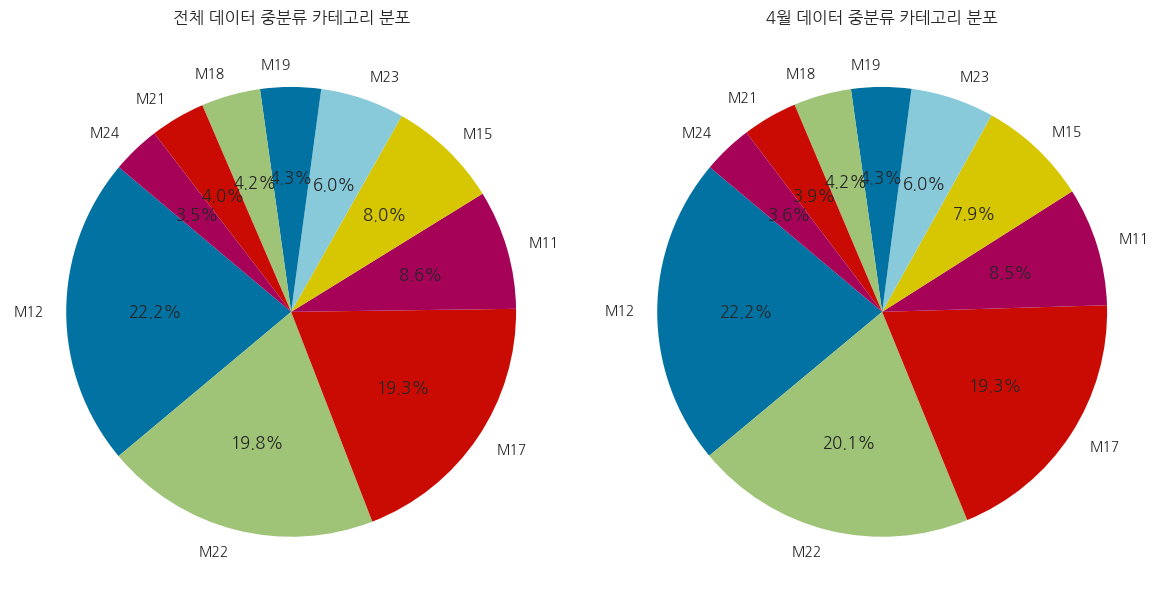

In [30]:
import matplotlib.pyplot as plt

# 전체 데이터의 중분류 카테고리 비율 (M_counts)
M_counts_sorted = M_counts.sort_values(by='M_Count', ascending=False).head(10)  # 상위 10개 카테고리만 표시
M_counts_april_sorted = M_counts_april.sort_values(by='M_Count', ascending=False).head(10)  # 상위 10개 카테고리만 표시

# 전체 데이터 파이차트
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1행 2열에서 첫 번째 subplot
plt.pie(M_counts_sorted['M_Count'], labels=M_counts_sorted['M_Code'], autopct='%1.1f%%', startangle=140)
plt.title('전체 데이터 중분류 카테고리 분포')

# 7월 데이터 파이차트
plt.subplot(1, 2, 2)  # 1행 2열에서 두 번째 subplot
plt.pie(M_counts_april_sorted['M_Count'], labels=M_counts_april_sorted['M_Code'], autopct='%1.1f%%', startangle=140)
plt.title('4월 데이터 중분류 카테고리 분포')

# 그래프를 화면에 표시
plt.tight_layout()  # 그래프 간의 간격을 자동으로 조정
plt.show()


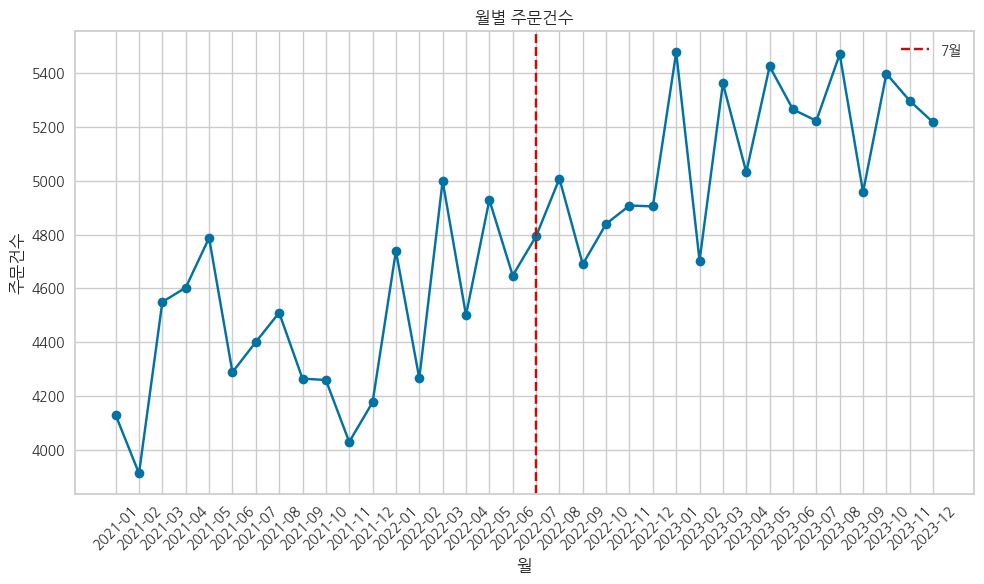

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. OrderDT에서 연도와 월을 추출
df_exploded['YearMonth'] = pd.to_datetime(df_exploded['OrderDT']).dt.to_period('M')

# 2. 월별 주문건수 집계
monthly_order_counts = df_exploded.groupby('YearMonth')['idOrder'].nunique().reset_index()

# 3. 시각화 (월별 주문건수 그래프)
plt.figure(figsize=(10, 6))
plt.plot(monthly_order_counts['YearMonth'].astype(str), monthly_order_counts['idOrder'], marker='o', linestyle='-', color='b')

# 그래프 꾸미기
plt.title('월별 주문건수')
plt.xlabel('월')
plt.ylabel('주문건수')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.grid(True)

# 7월 강조 (7월이 특정 월이라면 이를 강조할 수 있음)
plt.axvline(x='2022-07', color='r', linestyle='--', label='7월')  # 7월 구분선
plt.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()


In [79]:
# df_items에서 ItemCode와 Price를 기준으로 매칭되는 가격 정보를 가져옴
item_price_dict = df_items.set_index('ItemCode')['PriceMin'].to_dict()  # 가격을 PriceMin으로 사용 (기본적으로 최소 가격을 사용)

# 주문별로 매출액 계산: 각 ItemCode의 가격을 찾아 합산
def calculate_revenue(item_codes):
    return sum(item_price_dict.get(code, 0) for code in item_codes)

# df_use에서 각 주문의 매출액을 계산
df_exploded['Revenue'] = df_exploded['ItemCode'].apply(calculate_revenue)

# 1. OrderDT에서 연도-월 정보를 추출
df_exploded['YearMonth'] = pd.to_datetime(df_exploded['OrderDT']).dt.to_period('M')

# 2. 월별 매출액 집계
monthly_revenue = df_exploded.groupby('YearMonth')['Revenue'].sum().reset_index()


monthly_revenue

,YearMonth,Revenue
0,2021-01,253168810
1,2021-02,236817410
2,2021-03,273114190
3,2021-04,279252280
4,2021-05,289422580
5,2021-06,259345040
6,2021-07,267699210
7,2021-08,271803700
8,2021-09,258546700
9,2021-10,255413020


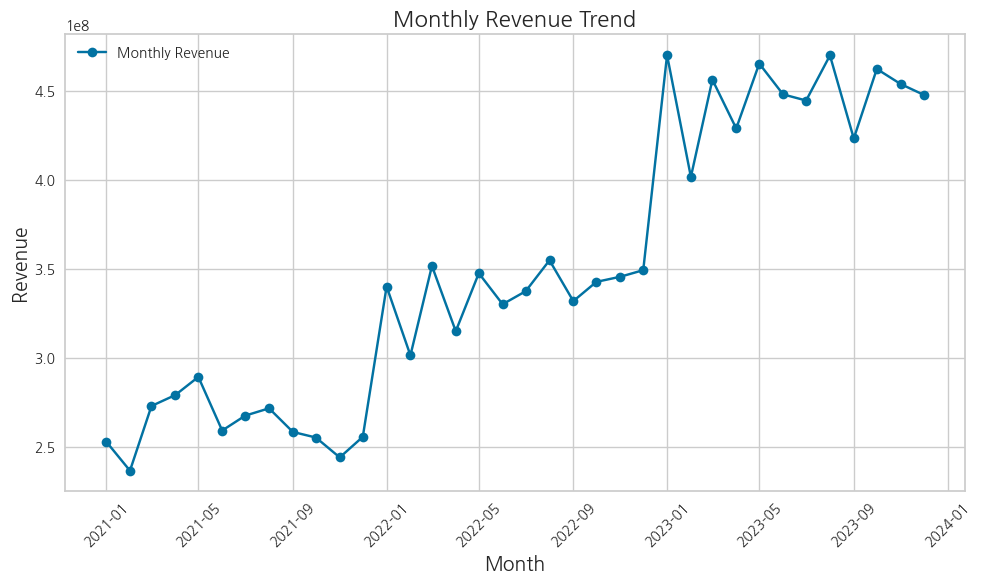

In [83]:
# 'Month' 열이 Period 형식일 때 datetime으로 변환
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].dt.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['YearMonth'], monthly_revenue['Revenue'], marker='o', color='b', label='Monthly Revenue')

# 제목 및 레이블 추가
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue', fontsize=14)

# x축 날짜 포맷 설정
plt.xticks(rotation=45)

# 그래프에 레전드 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 차트 보여주기
plt.tight_layout()
plt.show()

In [84]:
import pandas as pd

# 예시 데이터프레임 (df_use) 형식에 맞춰 가정
# OrderDT는 날짜 형식이어야 하고, ItemCode는 리스트 형식

# 예시 데이터프레임에서 연도별 7월 달에 해당하는 데이터를 추출하는 과정
df_use['OrderDT'] = pd.to_datetime(df_use['OrderDT'], format='%d%b%y:%H:%M:%S')  # 날짜 형식으로 변환

# 연도별로 7월인 데이터를 필터링
df_use['Year'] = df_use['OrderDT'].dt.year
df_use['Month'] = df_use['OrderDT'].dt.month

# 7월에 해당하는 데이터만 필터링
df_july = df_use[df_use['Month'] == 7]

# 'ItemCode'가 리스트 형식으로 되어 있으므로, L과 M을 추출하는 함수 정의
def extract_LM(item_codes):
    L_codes = [item.split('-')[0] for item in item_codes]  # 대분류(L) 추출
    M_codes = [item.split('-')[1] for item in item_codes]  # 중분류(M) 추출
    return L_codes, M_codes

# 'ItemCode' 컬럼에서 대분류(L)와 중분류(M) 추출
df_july[['L_codes', 'M_codes']] = df_july['ItemCode'].apply(lambda x: pd.Series(extract_LM(x)))

# 'L_codes'와 'M_codes'를 explode하여 행을 확장
df_july_exploded = df_july.explode('L_codes').explode('M_codes')

# 연도별로 카테고리별 카운트
category_counts_by_year = df_july_exploded.groupby(['Year', 'L_codes', 'M_codes']).size().reset_index(name='Count')

# 결과 확인
print(category_counts_by_year)


/tmp/ipykernel_29011/1861649769.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_july[['L_codes', 'M_codes']] = df_july['ItemCode'].apply(lambda x: pd.Series(extract_LM(x)))
/tmp/ipykernel_29011/1861649769.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_july[['L_codes', 'M_codes']] = df_july['ItemCode'].apply(lambda x: pd.Series(extract_LM(x)))


     Year L_codes M_codes  Count
0    2021      L1     M11   4039
1    2021      L1     M12   8522
2    2021      L1     M13    944
3    2021      L1     M15   3779
4    2021      L1     M16    131
..    ...     ...     ...    ...
163  2023      L5     M21     98
164  2023      L5     M22    515
165  2023      L5     M23    155
166  2023      L5     M24     73
167  2023      L5     M25    140

[168 rows x 4 columns]


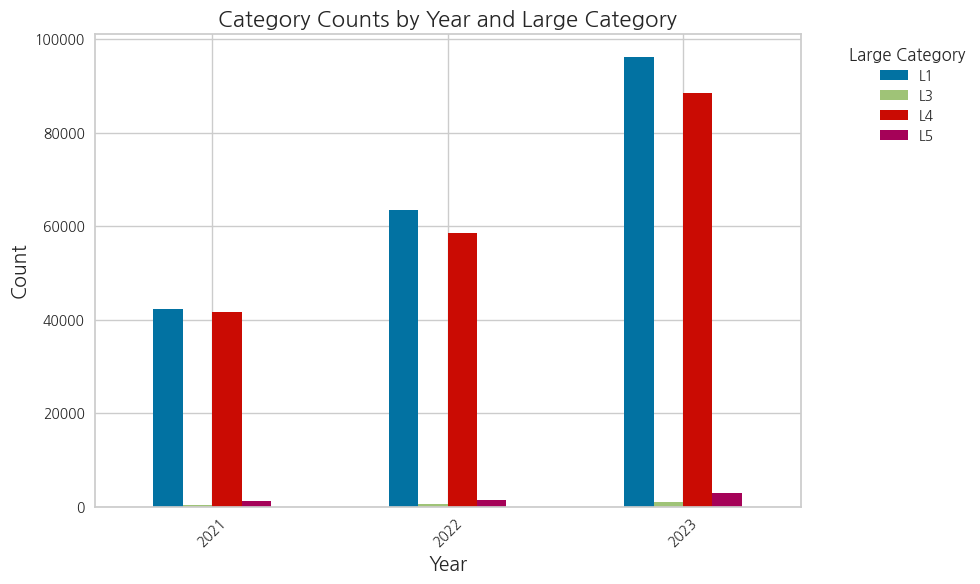

In [85]:
import matplotlib.pyplot as plt

# 연도별로 카테고리별 주문 건수 시각화 (예: 대분류(L)에 따른 매출 차트)
category_counts_by_year_pivot = category_counts_by_year.pivot_table(index='Year', columns='L_codes', values='Count', aggfunc='sum')

# 차트 그리기
category_counts_by_year_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Category Counts by Year and Large Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Large Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


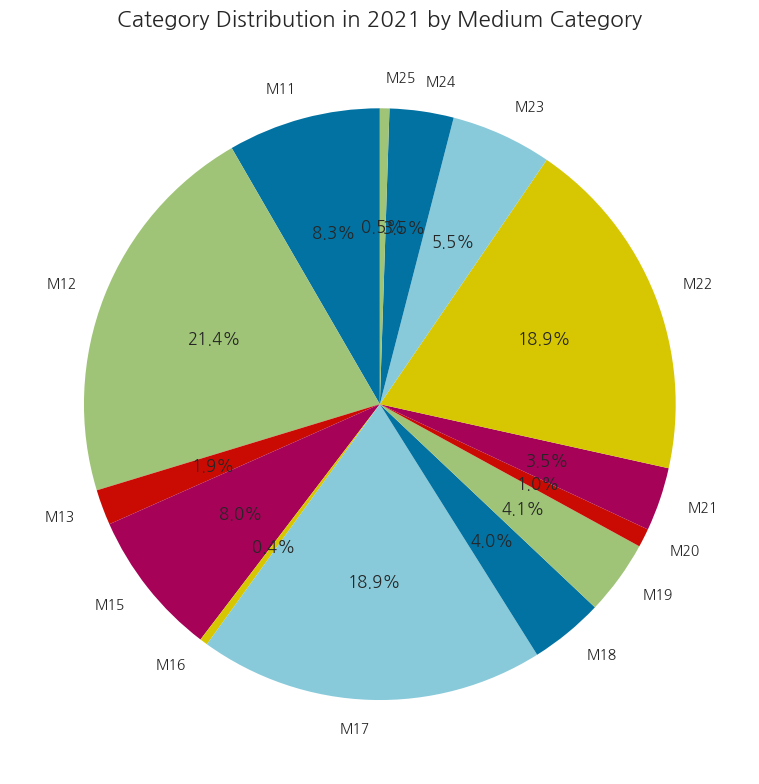

In [86]:
import matplotlib.pyplot as plt

# 연도별로 중분류(M)에 따른 주문 건수 집계
category_counts_by_year_pivot_m = category_counts_by_year.pivot_table(index='Year', columns='M_codes', values='Count', aggfunc='sum')

# 예시로, 2021년에 대한 파이 차트 그리기
year_to_plot = 2021  # 연도를 선택 (예: 2021년)
category_counts_for_year = category_counts_by_year_pivot_m.loc[year_to_plot]

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
category_counts_for_year.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)

# 제목 설정
plt.title(f'Category Distribution in {year_to_plot} by Medium Category', fontsize=16)

# 차트 보이기
plt.ylabel('')  # y-axis label 없애기
plt.tight_layout()
plt.show()


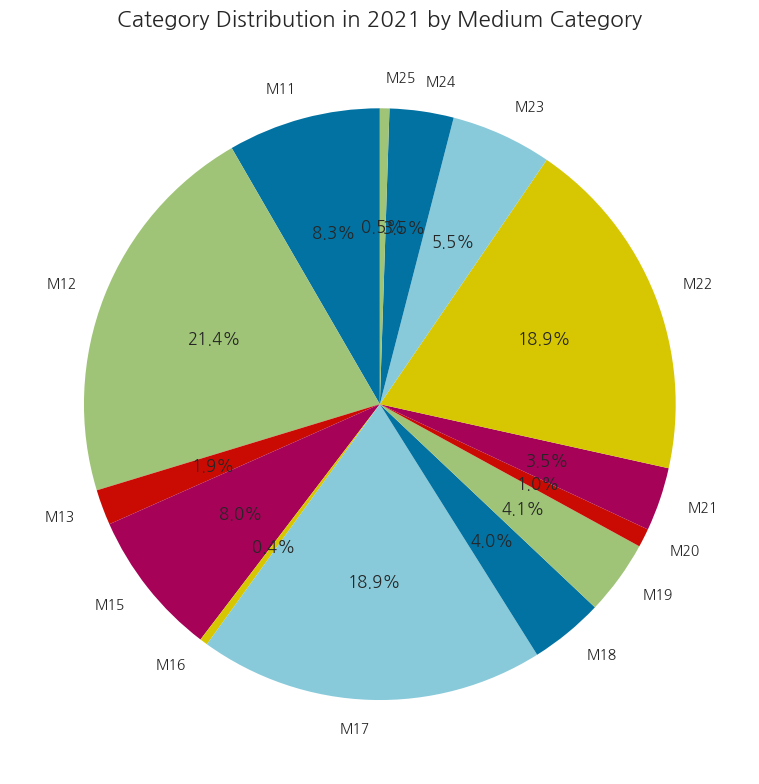

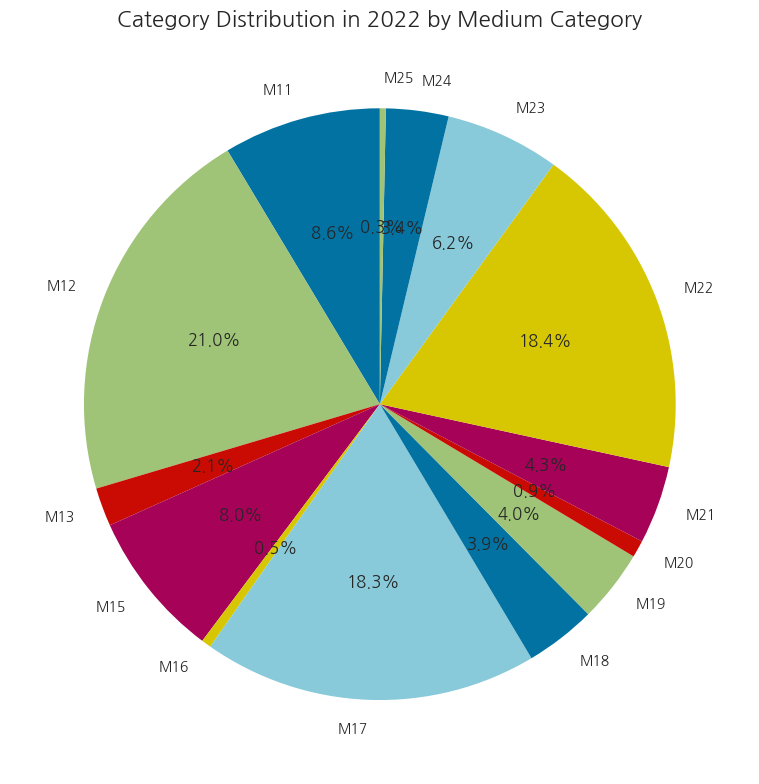

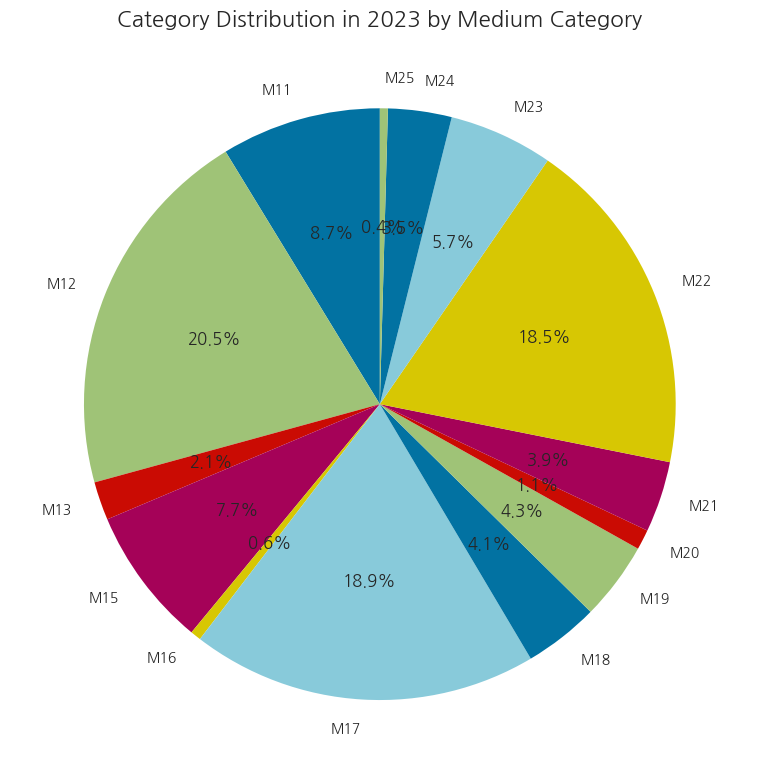

In [87]:
import matplotlib.pyplot as plt

# 연도별로 중분류(M)에 따른 주문 건수 집계
category_counts_by_year_pivot_m = category_counts_by_year.pivot_table(index='Year', columns='M_codes', values='Count', aggfunc='sum')

# 모든 연도에 대해 파이 차트 그리기
for year in category_counts_by_year_pivot_m.index:
    category_counts_for_year = category_counts_by_year_pivot_m.loc[year]
    
    # 파이 차트 그리기
    plt.figure(figsize=(8, 8))
    category_counts_for_year.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
    
    # 제목 설정
    plt.title(f'Category Distribution in {year} by Medium Category', fontsize=16)
    
    # 차트 보이기
    plt.ylabel('')  # y-axis label 없애기
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_29011/2172473038.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_july[['L_codes', 'M_codes']] = df_july['ItemCode'].apply(lambda x: pd.Series(extract_LM(x)))
/tmp/ipykernel_29011/2172473038.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_july[['L_codes', 'M_codes']] = df_july['ItemCode'].apply(lambda x: pd.Series(extract_LM(x)))


<Figure size 800x800 with 0 Axes>

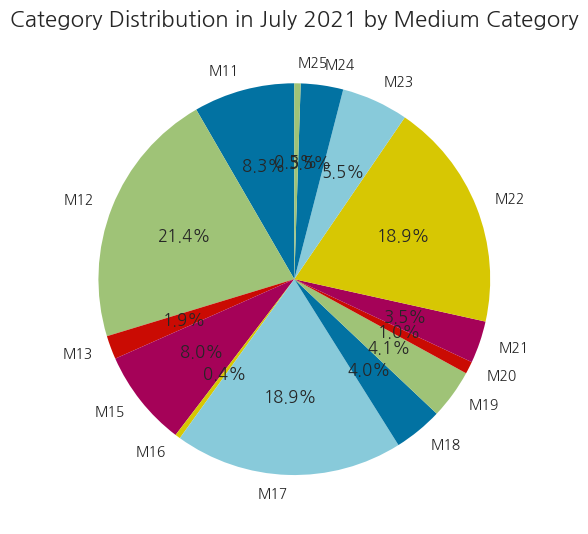

<Figure size 800x800 with 0 Axes>

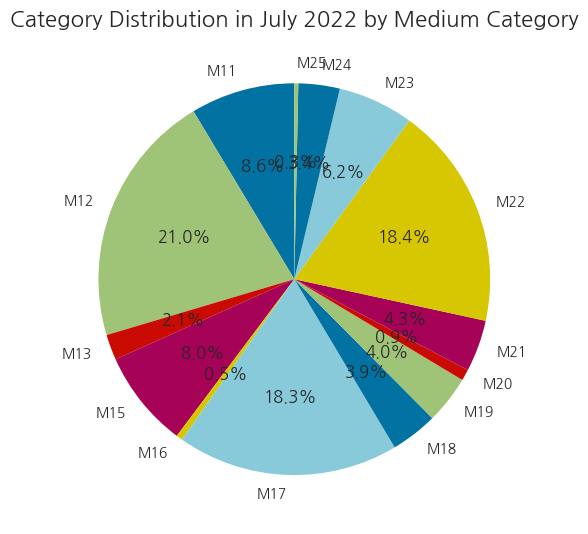

<Figure size 800x800 with 0 Axes>

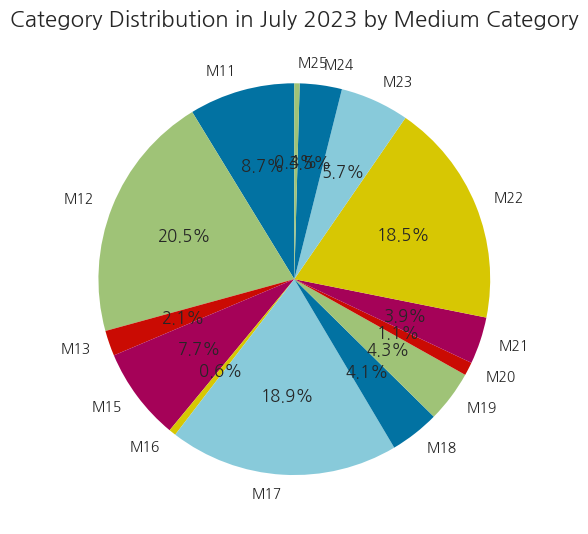

In [88]:
import matplotlib.pyplot as plt

# 1. 7월에 해당하는 데이터만 필터링
df_use['OrderDT'] = pd.to_datetime(df_use['OrderDT'], format='%d%b%y:%H:%M:%S')  # 날짜 형식으로 변환
df_use['Year'] = df_use['OrderDT'].dt.year
df_use['Month'] = df_use['OrderDT'].dt.month

# 7월에 해당하는 데이터만 필터링
df_july = df_use[df_use['Month'] == 7]

# 2. 'ItemCode'에서 대분류(L)와 중분류(M) 추출하는 함수 정의
def extract_LM(item_codes):
    L_codes = [item.split('-')[0] for item in item_codes]  # 대분류(L) 추출
    M_codes = [item.split('-')[1] for item in item_codes]  # 중분류(M) 추출
    return L_codes, M_codes

# 'ItemCode' 컬럼에서 대분류(L)와 중분류(M) 추출
df_july[['L_codes', 'M_codes']] = df_july['ItemCode'].apply(lambda x: pd.Series(extract_LM(x)))

# 3. 'L_codes'와 'M_codes'를 explode하여 행을 확장
df_july_exploded = df_july.explode('L_codes').explode('M_codes')

# 4. 연도별 7월에 해당하는 중분류(M) 카테고리별 주문 건수 집계
category_counts_by_year_july = df_july_exploded.groupby(['Year', 'M_codes']).size().reset_index(name='Count')

# 5. 연도별로 파이 차트 그리기
for year in category_counts_by_year_july['Year'].unique():
    category_counts_for_year = category_counts_by_year_july[category_counts_by_year_july['Year'] == year]
    
    # 파이 차트 그리기
    plt.figure(figsize=(8, 8))
    category_counts_for_year.set_index('M_codes').plot(kind='pie', y='Count', autopct='%1.1f%%', startangle=90, legend=False)
    
    # 제목 설정
    plt.title(f'Category Distribution in July {year} by Medium Category', fontsize=16)
    
    # 차트 보이기
    plt.ylabel('')  # y-axis label 없애기
    plt.tight_layout()
    plt.show()
